<a href="https://colab.research.google.com/github/zakonreal/da_homework_student2/blob/main/Lesson3/hometask/SyntheticRubber1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/SyntheticRubber.ipynb)

In [53]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from bs4 import BeautifulSoup
import numpy as np
pd.options.display.max_rows = 10

In [3]:
# Для работы с API может потребоваться обходное решение для работы с SSL сертификатом
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании.
* Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании.
* Ваши клиенты предпочитают формульный подход к ценообразованию и вам нужно предложить клиентам формулу цены на синтетический каучук, который может быть альтернативой натуральному каучуку с грейдом SMR 20.
* В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками.
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [56]:
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


In [140]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
# year = '2022'
# month = '05'
# url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
# res = requests.get(url)
# rj = res.json()
# df = pd.json_normalize(rj)
# df.head()

In [92]:
# Котировки натурального каучука за период 2019-2022
year1 = '2022'
year2 = '2019'
month1 = '01'
month1 = '12'
df_rubber = pd.DataFrame()
for i in ['2019', '2020', '2021', '2022']:
  for j in ['01', '02', '03', '04','05', '06', '07', '08','09', '10', '11', '12']:
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={j}&year={i}"
    res = requests.get(url)
    rj = res.json()
    df1 = pd.json_normalize(rj)
    df_rubber = df_rubber.append(df1, ignore_index=True)

In [93]:
df_rubber

,date,grade,masa,rm,us,tone
0,2019-01-31,SMR CV,Noon,770.00,191.30,Quiet
1,2019-01-31,SMR L,Noon,750.00,186.35,Quiet
2,2019-01-31,SMR 5,Noon,549.50,136.50,Quiet
3,2019-01-31,SMR GP,Noon,546.50,135.80,Quiet
4,2019-01-31,SMR 10,Noon,539.50,134.05,Quiet
...,...,...,...,...,...,...
5952,2022-07-01,SMR 5,Noon,726.00,167.60,Steady
5953,2022-07-01,SMR GP,Noon,723.00,166.90,Steady
5954,2022-07-01,SMR 10,Noon,716.00,165.30,Steady
5955,2022-07-01,SMR 20,Noon,714.00,164.80,Steady


In [94]:
DF = df_rubber.set_index('date')

In [95]:
DFF = DF.rename(columns={'us': 'Close'})

In [96]:
DFF.index = pd.to_datetime(DFF.index)

In [97]:
DFF.index

DatetimeIndex(['2019-01-31', '2019-01-31', '2019-01-31', '2019-01-31',
               '2019-01-31', '2019-01-31', '2019-01-31', '2019-01-30',
               '2019-01-30', '2019-01-30',
               ...
               '2022-07-04', '2022-07-04', '2022-07-04', '2022-07-01',
               '2022-07-01', '2022-07-01', '2022-07-01', '2022-07-01',
               '2022-07-01', '2022-07-01'],
              dtype='datetime64[ns]', name='date', length=5957, freq=None)

In [108]:
DFF = DFF.astype({'Close': np.float})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [109]:
DFF.Close

date
2019-01-31    191.30
2019-01-31    186.35
2019-01-31    136.50
2019-01-31    135.80
2019-01-31    134.05
               ...  
2022-07-01    167.60
2022-07-01    166.90
2022-07-01    165.30
2022-07-01    164.80
2022-07-01    567.00
Name: Close, Length: 5957, dtype: float64

In [114]:
df_rubber_m = DFF.Close.resample('M').mean()

In [ ]:
# Тикеры
# курс евро к доллару 'EURUSD=X'
# курс евро к рублю 'EURRUB=X'
# курс доллара к рублю 'USDRUB=X'

In [40]:
# котировки цен
exr_eurusd = yf.download( 'EURUSD=X')
exr_usdrub = yf.download('USDRUB=X')
exr_eurrub = yf.download('EURRUB=X')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [115]:
df_dict = {}
for ticker in tqdm(['USDRUB=X', 'EURUSD=X', 'EURRUB=X']):
    df = yf.download(ticker)
    df = df.Close.copy()
    df = df.resample('M').mean()
    df_dict[ticker] = df

  0%|          | 0/3 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [123]:
main_df = pd.concat(df_dict.values(), axis=1)
main_df = pd.concat([df_rubber_m, main_df], axis=1)
main_df.columns = ['CRUDE_RUBBER_USD','USDRUB', 'EURUSD', 'EURRUB']
main_df = main_df.loc['2019-06-30':'2022-06-30'].copy()

In [127]:
main_df

,CRUDE_RUBBER_USD,USDRUB,EURUSD,EURRUB
2019-06-30,224.053175,64.168690,1.129002,72.458005
2019-07-31,207.373701,63.176222,1.122682,70.956822
2019-08-31,190.399660,65.687992,1.113163,73.143709
2019-09-30,191.488492,64.971148,1.101377,71.589861
2019-10-31,186.057468,64.341009,1.104839,71.093322
...,...,...,...,...
2022-02-28,274.737302,77.466339,1.133995,87.878880
2022-03-31,278.389752,111.013403,1.102412,132.952291
2022-04-30,270.460150,80.666187,1.082745,86.109895
2022-05-31,264.685317,65.422944,1.057322,68.104363


In [129]:
main_df['MWP_PRICE_EUR'] = main_df.CRUDE_RUBBER_USD*16 * (1/main_df.EURUSD) + 400
main_df['MWP_PRICE_USD'] = main_df.CRUDE_RUBBER_USD*16 + 400 * main_df.EURUSD

In [130]:
# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

In [131]:
main_df['MWP_PRICE_EUR_EU'] = main_df['MWP_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
main_df['MWP_PRICE_USD_CN'] = main_df['MWP_PRICE_USD'] + CN_LOGISTIC_COST_USD

In [133]:
main_df['MWP_PRICE_EUR_EU_MA'] = main_df.MWP_PRICE_EUR_EU.rolling(window=3).mean()

In [134]:
main_df

,CRUDE_RUBBER_USD,USDRUB,EURUSD,EURRUB,MWP_PRICE_EUR,MWP_PRICE_USD,MWP_PRICE_EUR_EU,MWP_PRICE_USD_CN,MWP_PRICE_EUR_EU_MA
2019-06-30,224.053175,64.168690,1.129002,72.458005,3575.238760,4036.451579,3605.238760,4166.451579,NaN
2019-07-31,207.373701,63.176222,1.122682,70.956822,3355.405234,3767.051880,3385.405234,3897.051880,NaN
2019-08-31,190.399660,65.687992,1.113163,73.143709,3136.700703,3491.659844,3166.700703,3621.659844,3385.781566
2019-09-30,191.488492,64.971148,1.101377,71.589861,3181.804889,3504.366666,3211.804889,3634.366666,3254.636942
2019-10-31,186.057468,64.341009,1.104839,71.093322,3094.436582,3418.855208,3124.436582,3548.855208,3167.647392
...,...,...,...,...,...,...,...,...,...
2022-02-28,274.737302,77.466339,1.133995,87.878880,4276.379456,4849.395022,4306.379456,4979.395022,4034.509179
2022-03-31,278.389752,111.013403,1.102412,132.952291,4440.444054,4895.201024,4470.444054,5025.201024,4253.016487
2022-04-30,270.460150,80.666187,1.082745,86.109895,4396.660707,4760.460207,4426.660707,4890.460207,4401.161406
2022-05-31,264.685317,65.422944,1.057322,68.104363,4405.367788,4657.894039,4435.367788,4787.894039,4444.157516


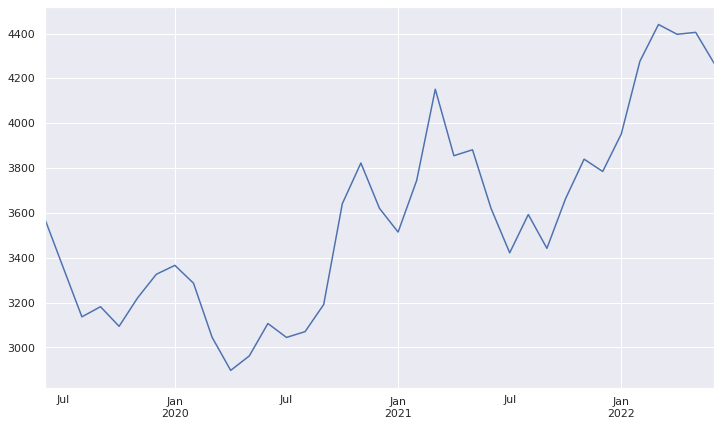

In [135]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
# График с базовой ценой(на заводе) в евро
main_df['MWP_PRICE_EUR'].plot();

In [136]:
customers

{'Monty': {'comment': 'moving_average', 'location': 'EU', 'volumes': 200},
 'Poly': {'comment': 'monthly', 'location': 'EU', 'volumes': 70},
 'Stone': {'comment': 'moving_average', 'location': 'EU', 'volumes': 150},
 'Triangle': {'comment': 'monthly', 'location': 'CN', 'volumes': 30}}

In [137]:
discounts

{'300 plus': 0.1, 'up to 100': 0.01, 'up to 300': 0.05}

In [138]:
discounts = {100: 0.01, 300: 0.05, 301: 0.1}

In [139]:
for client ,v in customers.items():
    location = client.get('location')
    disc = 0
    if client.get('location') == "EU":
        for k_lim, discount_share in discounts.items():
            if client.get('volumes') > k_lim:
                continue
            else:
               disc = discount_share
    elif client.get('location') == 'CN':
        pass

AttributeError: ignored

# Задание 2. Продолжение

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

# Задание 3. Back to Russia

К вам пришел новый клиент из России, он готов регулярно закупать синтетический каучук. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a> или из любого другого источника.


In [7]:
# 

# Задание 4. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [8]:
# 

# Задание 5. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [9]:
# import yourpackage

# Задание 6. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [10]:
# !pip install yourpackage
# import yourpackage